Here I finalize the pipeline and ensure it gives me the
probabilities I want at the end when given an image.

In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import skimage
import skimage.color
import skimage.io
import skimage.feature
import skimage.transform
%matplotlib inline

We transform the image into a mode where our model can process it.
Then we rescale it by multiplying by 255.
Then convert it to uint8 since our model expects an 8 bit array image.

Then we convert it to grayscale

Then into a hog feature.

In [28]:
#pipeline model
image = skimage.io.imread('eagle.jpg')

#Transform image into 80 x 80
image_resize = skimage.transform.resize(image, (80, 80))
image_scale = 255*image_resize
image_transform = image_scale.astype(np.uint8)

#rgb to gray
gray = skimage.color.rgb2gray(image_transform)
#hog feature
feature_vector = skimage.feature.hog(gray,
                                     orientations=9,
                                     pixels_per_cell=(8,8), cells_per_block=(3,3))




In [29]:
feature_vector

array([0.01566118, 0.01359198, 0.02500137, ..., 0.03805931, 0.02104542,
       0.00313196])

We then load our model and try to predict what the image is.

In [40]:
model_svm = pickle.load(open('dsa_image_classification_svc.pickle', 'rb'))

In [41]:
scaler = pickle.load(open('dsa_scaler.pickle', 'rb'))

In [42]:
model_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

For just a test, the model predicted eagle correctly.

In [43]:
scalex = scaler.transform(feature_vector.reshape(1,-1))
result = model_svm.predict(scalex)

In [44]:
result

array(['eagle'], dtype='<U8')

In [90]:
#probability
predicted_prob = model_svm.predict_proba(scalex)
predicted_prob = predicted_prob.flatten()
labels = model_svm.classes_

<BarContainer object of 20 artists>

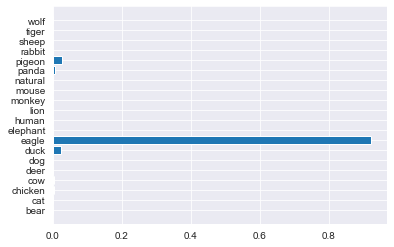

In [56]:
plt.barh(labels, predicted_prob)


In [57]:
predicted_prob

array([3.71710380e-04, 1.32500199e-03, 3.78408445e-03, 3.11653383e-03,
       2.80152632e-04, 1.97183162e-03, 2.52398104e-02, 9.24167497e-01,
       2.43734461e-04, 5.84007259e-04, 1.04753824e-04, 1.97603422e-03,
       6.10250844e-04, 5.18944401e-04, 5.76324527e-03, 2.66491830e-02,
       1.34743221e-03, 1.18137603e-03, 6.86017486e-04, 7.83983018e-05])

In [58]:
labels

array(['bear', 'cat', 'chicken', 'cow', 'deer', 'dog', 'duck', 'eagle',
       'elephant', 'human', 'lion', 'monkey', 'mouse', 'natural', 'panda',
       'pigeon', 'rabbit', 'sheep', 'tiger', 'wolf'], dtype='<U8')

In [77]:
top_5_prob_ind = predicted_prob.argsort()[::-1][:5]

In [79]:
top_5_prob_ind

array([ 7, 15,  6, 14,  2], dtype=int64)

In [82]:
top_labels = labels[top_5_prob_ind]
top_prob = predicted_prob[top_5_prob_ind]

The probabilities of prediction

In [108]:
top_dict = dict()
for key, val in zip(top_labels, top_prob):
    top_dict.update({key: str(np.round(val,2)*100) + " %"})
#print(str(key) +" " + str(np.round(val,2)*100) + " %")

In [110]:
def pipeline_model(path, scaler_transform, model):
    #pipeline model
    image = skimage.io.imread(path)

    #Transform image into 80 x 80
    image_resize = skimage.transform.resize(image, (80, 80))
    image_scale = 255*image_resize
    image_transform = image_scale.astype(np.uint8)

    #rgb to gray
    gray = skimage.color.rgb2gray(image_transform)
    #hog feature
    feature_vector = skimage.feature.hog(gray,
                                         orientations=9,
                                         pixels_per_cell=(8,8), cells_per_block=(3,3))

    #scaling
    scalex = scaler_transform.transform(feature_vector.reshape(1,-1))
    result = model.predict(scalex)

    #probability
    predicted_prob = model.predict_proba(scalex)
    predicted_prob = predicted_prob.flatten()
    labels = model.classes_

    top_5_prob_ind = predicted_prob.argsort()[::-1][:5]
    top_labels = labels[top_5_prob_ind]
    top_prob = predicted_prob[top_5_prob_ind]

    top_dict = dict()
    for key, val in zip(top_labels, top_prob):
        top_dict.update({key: str(np.round(val,2)*100) + " %"})

    return top_dict

In [111]:
pipeline_model('eagle.jpg', scaler, model_svm)

{'eagle': '92.0 %',
 'pigeon': '3.0 %',
 'duck': '3.0 %',
 'panda': '1.0 %',
 'chicken': '0.0 %'}